In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import tiktoken

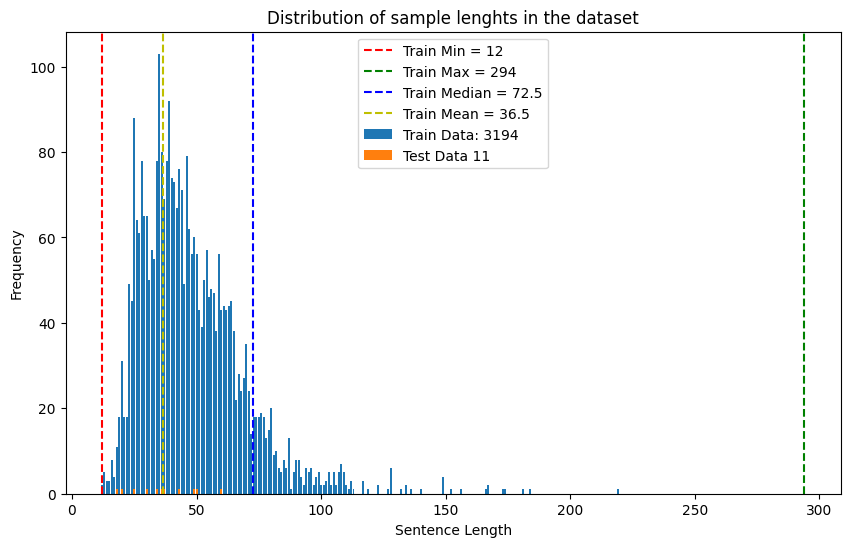

In [10]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo-1106")

# Initialize dictionaries to store sentence lengths and their frequencies
sentence_lengths = {}
sentence_lengths_test = {}
count_train = 0
count_test = 0

# Open and read the JSONL file
with open("dataset_converter/train.jsonl", "r") as file:
    for line in file:
        count_train += 1
        data = json.loads(line)
        conversations = data["conversations"]
        for i in range(0, len(conversations), 2):
            sentence1 = conversations[i]
            sentence2 = conversations[i + 1]
            combined_sentence = sentence1 + " " + sentence2
            length = len(encoding.encode(combined_sentence))

            if length in sentence_lengths:
                sentence_lengths[length] += 1
            else:
                sentence_lengths[length] = 1

# Open and read the JSONL file for test data
with open("dataset_converter/test.jsonl", "r") as file:
    for line in file:
        count_test += 1
        data = json.loads(line)
        conversations = data["conversations"]
        for i in range(0, len(conversations), 2):
            sentence1 = conversations[i]
            sentence2 = conversations[i + 1]
            combined_sentence = sentence1 + " " + sentence2
            length = len(encoding.encode(combined_sentence))

            if length in sentence_lengths_test:
                sentence_lengths_test[length] += 1
            else:
                sentence_lengths_test[length] = 1

# Extract sentence lengths and their frequencies for train and test data
lengths_train = list(sentence_lengths.keys())
frequencies_train = list(sentence_lengths.values())

lengths_test = list(sentence_lengths_test.keys())
frequencies_test = list(sentence_lengths_test.values())

# Calculate minimum, maximum, and median sentence lengths for train and test data
min_length_train = min(lengths_train)
max_length_train = max(lengths_train)
median_length_train = np.median(lengths_train)
mean_length_train = round(np.mean(lengths_test), 1)

min_length_test = min(lengths_test)
max_length_test = max(lengths_test)
median_length_test = np.median(lengths_test)

# Plot sentence lengths and their frequencies for train and test data
plt.figure(figsize=(10, 6))
plt.bar(lengths_train, frequencies_train, label=f"Train Data: {count_train}")
plt.bar(lengths_test, frequencies_test, label=f"Test Data {count_test}")
plt.axvline(
    x=min_length_train,
    color="r",
    linestyle="--",
    label=f"Train Min = {min_length_train}",
)
plt.axvline(
    x=max_length_train,
    color="g",
    linestyle="--",
    label=f"Train Max = {max_length_train}",
)
plt.axvline(
    x=median_length_train,
    color="b",
    linestyle="--",
    label=f"Train Median = {median_length_train}",
)

plt.axvline(
    x=mean_length_train,
    color="y",
    linestyle="--",
    label=f"Train Mean = {mean_length_train}",
)

plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of sample lenghts in the dataset")
plt.legend()
plt.show()

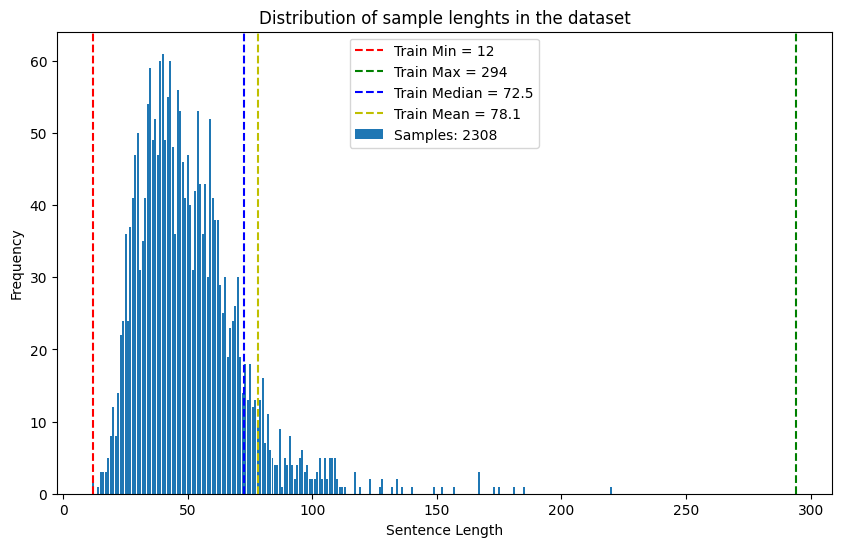

In [5]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo-1106")

# Initialize dictionaries to store sentence lengths and their frequencies
sentence_lengths = {}
sentence_lengths_test = {}
count_train = 0
count_test = 0

# Open and read the JSONL file
with open("dataset_converter/full_dataset_anonym_cleaned.jsonl", "r") as file:
    for line in file:
        count_train += 1
        data = json.loads(line)
        conversations = data["conversations"]
        for i in range(0, len(conversations), 2):
            sentence1 = conversations[i]
            sentence2 = conversations[i + 1]
            combined_sentence = sentence1 + " " + sentence2
            length = len(encoding.encode(combined_sentence))

            if length in sentence_lengths:
                sentence_lengths[length] += 1
            else:
                sentence_lengths[length] = 1

# Extract sentence lengths and their frequencies for train and test data
lengths_train = list(sentence_lengths.keys())
frequencies_train = list(sentence_lengths.values())

# Calculate minimum, maximum, and median sentence lengths for train and test data
min_length_train = min(lengths_train)
max_length_train = max(lengths_train)
median_length_train = np.median(lengths_train)
mean_length_train = round(np.mean(lengths_train), 1)

# Plot sentence lengths and their frequencies for train and test data
plt.figure(figsize=(10, 6))
plt.bar(lengths_train, frequencies_train, label=f"Samples: {count_train}")
plt.axvline(
    x=min_length_train,
    color="r",
    linestyle="--",
    label=f"Train Min = {min_length_train}",
)
plt.axvline(
    x=max_length_train,
    color="g",
    linestyle="--",
    label=f"Train Max = {max_length_train}",
)
plt.axvline(
    x=median_length_train,
    color="b",
    linestyle="--",
    label=f"Train Median = {median_length_train}",
)

plt.axvline(
    x=mean_length_train,
    color="y",
    linestyle="--",
    label=f"Train Mean = {mean_length_train}",
)

plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Distribution of sample lenghts in the dataset")
plt.legend()
plt.show()